# Learning Part

## 1. What is the difference between dictionary[key] and dictionary[key].items( ) in python

In [19]:
# Example 1
my_dict = {'name': 'John', 'age': 25, 'city': 'Seattle'}
print(my_dict['name'])  # Output: John
print(my_dict['age'])  # Output: 25

# Example 2
my_dict = {'name': 'John', 'age': 25, 'city': 'Seattle'}


John
25


In [17]:
print(my_dict['name'].items())  # Output: AttributeError: 'str' object has no attribute 'items'


AttributeError: 'str' object has no attribute 'items'

In [18]:
print(my_dict.items())  # Output: dict_items([('name', 'John'), ('age', 25), ('city', 'Seattle')])

dict_items([('name', 'John'), ('age', 25), ('city', 'Seattle')])


## 2. pd.merge: 

- pd.merge() is a method in pandas that lets you do SQL type joins in pandas. You can combine dataframes using inner, left, right, outer joins. It is useful when the data for the analysis are not in one dataframe but spread across multiple dataframes
- Inner join only return the matching rows between two tables and non matching rows gets eliminated.
- Left join returns all the matching rows between both the tables as well as non matching rows from the left table.

In [21]:
import pandas as pd

df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value': [5, 6, 7, 8]})
print(df1)
merged_df = pd.merge(df1, df2, on='key', how='inner')
print(merged_df)

  key  value
0   A      1
1   B      2
2   C      3
3   D      4
  key  value_x  value_y
0   B        2        5
1   D        4        6


## 3. try and except block

In Python, try and except blocks are used for error handling. The try block contains the code that might raise an exception, and the except block contains the code that will be executed if an exception is raised. Here is an example of how to use try and except blocks in Python to handle errors when dividing by zero:

In [23]:
try:
    x = 5 / 0
except ZeroDivisionError:
    print("You can't divide by zero!")

You can't divide by zero!


In [24]:
try:
    x = int(input("Please enter a number: "))
    y = 5 / x
except ZeroDivisionError:
    print("You can't divide by zero!")
except ValueError:
    print("You must enter a number!")

Please enter a number: o
You must enter a number!


## 4. example of how to use the reset_index method in pandas:

In [2]:
import pandas as pd

# create a sample dataframe
data = {'name': ['John', 'Mike', 'Sally', 'Jane'],
        'age': [25, 30, 21, 18],
        'gender': ['M', 'M', 'F', 'F']}
df = pd.DataFrame(data)

# select columns
cols = ['name', 'age']

# reset index
df1 = df[cols].reset_index(drop=False) # drop means remove the old index column
df2=df[cols]
df3 = df[cols].reset_index(drop= True)
print(df1,df2,df3,sep='\n')

   index   name  age
0      0   John   25
1      1   Mike   30
2      2  Sally   21
3      3   Jane   18
    name  age
0   John   25
1   Mike   30
2  Sally   21
3   Jane   18
    name  age
0   John   25
1   Mike   30
2  Sally   21
3   Jane   18


## 5. example of how to use the groupby method in pandas:

In [44]:
import pandas as pd

# create a sample dataframe
data = {'from': ['A', 'B', 'A', 'B', 'C'],
        'refid': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# group by 'from' column and apply 'list' function to 'refid' column
result = df.groupby('from')['refid'].apply(list)

print(result)

from
A    [1, 3]
B    [2, 4]
C       [5]
Name: refid, dtype: object


In [ ]:
jiushi

In [ ]:
Sure. Here's an example of how to use TrustRank in Python:

```python
import networkx as nx

def trust_rank(G, seed_set, alpha=0.85, max_iter=100, tol=1.0e-6):
    # Initialize the scores of all nodes to 1
    scores = dict.fromkeys(G.nodes(), 1.0)

    # Initialize the scores of seed nodes to 0
    for node in seed_set:
        scores[node] = 0.0

    # Iterate until convergence
    for i in range(max_iter):
        prev_scores = scores.copy()

        # Update the score of each node
        for node in G.nodes():
            score = 0.0

            # Calculate the score based on incoming edges
            for neighbor in G.predecessors(node):
                if neighbor in prev_scores:
                    score += prev_scores[neighbor] / len(list(G.successors(neighbor)))

            # Add the damping factor and the seed set bias
            scores[node] = alpha * score + (1 - alpha) * (node in seed_set)

        # Check for convergence
        if sum(abs(scores[node] - prev_scores[node]) for node in G.nodes()) < tol:
            break

    return scores
```

This function takes a NetworkX graph `G`, a seed set of trusted nodes `seed_set`, and optional parameters `alpha`, `max_iter`, and `tol`. It returns a dictionary of TrustRank scores for each node in the graph.

To use this function, you can create a NetworkX graph object and call the `trust_rank()` function with your desired parameters. For example:

```python
import networkx as nx

# Create a graph object
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Define the seed set of trusted nodes
seed_set = [1]

# Calculate the TrustRank scores
scores = trust_rank(G, seed_set)

# Print the scores
print(scores)
```

This will output a dictionary of TrustRank scores for each node in the graph.

-------------------------------

# Libraries
https://www.kaggle.com/code/ldegioanni/covid-19-papers-ranking/notebook#Part-I:-Data-Preparation

In [1]:
#Basic Sandbox
import os
import json
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#To generate a refid for each paper (dataset + bib_entries)
import hashlib #for sha1

#To build network and compute pagerank
import networkx as nx
import math as math

#For Data viz
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from datetime import timedelta

# Constants

$P^{2}_{author}=(0.25)*P_{coauthornetwork}(author)+(0.75)*\sum^{publication}{P_{citationnetwork}(pubilication)}$


In [2]:
#Weight parameters for Approach 2 and 3 :

weights_InfluenceScore = [0.25, 0.25, 0.25, 0.25]

# 1. Load data

- os.walk()： **for directory tree** is a Python method that generates the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames)

In [3]:
#1. Get the data
datafiles = []
for dirname, _, filenames in os.walk('/Users/Shared/Files From e.localized/Singapore/Semester2/PC5253 Complex system modeling/PageRank/Kaggle/input'):
    
    for filename in filenames:
            ifile = os.path.join(dirname, filename)
            # datafiles: 存储json文件
            if ifile.split(".")[-1] == "json":  
                datafiles.append(ifile)
            
print("Number of Files Loaded: ", len(datafiles))


Number of Files Loaded:  85371


In [4]:
#Loading metadata csv file to get the publish time
metadata = pd.read_csv("/Users/Shared/Files From e.localized/Singapore/Semester2/PC5253 Complex system modeling/PageRank//Kaggle/input/metadata_test1.csv")


- what is json file: JSON allows developers to store various data types as human-readable code, with the keys serving as names and the values containing related data 

In [5]:

#2. Creating of the two DataFrames:
#dfPaperList = df of Research Papers.. Variables: paper_id, paper_title, paper_authors
#dfCitationsFlat = df of all the citations . Variables: citationsId, paperId (where the citation is made),refid, title, year

authors = [] # paper id+ author name

citationsFlat = []
citationsCount = 0

for file in datafiles:
    with open(file,'r')as f:#opening a file in read mode
        doc = json.load(f)#doc is a dictionary, json.loas()return dictionary object
    paper_id = doc['paper_id']
    
    paper_authors = []

    for value in doc['metadata']['authors']:
        if len(doc['metadata']['authors']) == 0:
            paper_authors.append("NA")
        else:
            last = value["last"]
            first = value["first"]#first name ; last name
            paper_authors.append(first+" "+last)

    authors.append({"paper_id": paper_id, "authors" : paper_authors})

    for key,value in doc['bib_entries'].items():
        refid = key
        title = value['title'].lower()
        year = value['year']
        venue = value['venue'] 
        SHATitleCitation = hashlib.sha1(title.lower().encode()).hexdigest() #

        if (len(title) == 0):
            continue #there is noting we can do without any title

        citationsFlat.append({"citationId":citationsCount,\
                          "refid" : SHATitleCitation,\
                          "from": paper_id,\
                          "title": title.lower(),\
                          "year": year})
        citationsCount=citationsCount+1
        
#Conversion into DataFrame
dfCitationsFlat = pd.DataFrame(citationsFlat)# citationsId, paperId (where the citation is made),refid, title, year
authorsDf = pd.DataFrame(authors) # paper id+ author name

metadata_extract = metadata[["sha", "title", "abstract", "publish_time"]].rename(columns = {"sha" : "paper_id"})
dfPaperList = pd.merge(metadata_extract, authorsDf, on = "paper_id", how = "left")
# on the common column "paper_id" and use left join

dfPaperList["year"] = 0
dfPaperList["refid"] = ""

for i in range(len(dfPaperList)):
    
    dfPaperList["refid"][i] =  hashlib.sha1(str(dfPaperList["title"][i]).lower().encode()).hexdigest()
     #NB: We are building a custom identifier based on papers titles to ensure identification will be consistent between the papers in the Research Dataset and the papers extracted from the bib entries.
     #Unfortunately a paperId is not present for citations and doi is not provided for the whole dataset but title seem to be present for ~98% of the dataset. To enable and ease indexing capabilities we are hashing with SHA   
    dfPaperList["year"][i] = str(dfPaperList["publish_time"][i])[:4] # just want to get year
    
    try:
        dfPaperList["authors"][i] = dfPaperList["authors"][i].split(";")
    except:
        continue
        
quotationPapersFreq = pd.DataFrame({"refid" : dfCitationsFlat["refid"].value_counts().index, 
                       "nbQuotations" : dfCitationsFlat["title"].value_counts().values}) 

paperToScore = pd.merge(dfPaperList,quotationPapersFreq, on = "refid", how = "left")
paperToScore["nbQuotations"] = paperToScore["nbQuotations"].fillna(0)
#This is a Python code snippet that fills the missing values in the nbQuotations column of the paperToScore dataframe with 0.


#Adding list of references by papers according to the refid
refList = pd.DataFrame({"references" : dfCitationsFlat.groupby('from')['refid'].apply(list)}) 
refList["paper_id"] = refList.index; cols = ["paper_id","references"] ; refList = refList[cols].reset_index(drop = True) #Reformatting the reflist by papers
datasetForScoring = pd.merge(paperToScore, refList, how='left', on = 'paper_id').reset_index(drop = True)
#This code is grouping the refid column of the dfCitationsFlat dataframe by the values in the from column and applying the list function to the resulting groups. The list function creates a list of all the refid values in each group.

datasetForScoring = datasetForScoring[(datasetForScoring["authors"].isna() == False)].reset_index(drop = True)

In [6]:
#print(refList)

In [7]:
#type(doc)
#print(doc['bib_entries'].items())

In [8]:
#3. A few stats regarding number of papers loaded

print("Number of Papers in the CORD-19 dataset :",dfPaperList.shape[0])
#(05/14/2020) Number of Papers in the covid dataset : 63,571

print("Number of Citations found in the CORD-19 dataset :",dfCitationsFlat.shape[0])
#(05/14/2020) Number of Citations made in the covid dataset : 4,208,974

print("Citations with no title: ",sum(1 if x == "" else 0 for x in dfCitationsFlat["title"]))
#(05/14/2020) Citations with no title:  0

#How many duplicates? 
print("Number of duplicated research paper titles: ",len(dfPaperList["title"])-len(dfPaperList["title"].drop_duplicates()))
#(05/14/2020) Number of duplicated research paper titles:  1,421

print("Number of duplicated citations titles: ",len(dfCitationsFlat["title"])-len(dfCitationsFlat["title"].drop_duplicates()))
#(05/14/2020) Number of duplicated citations titles:  2,543,820

#Dataframe Visualization
print("Number of Papers that will be scored: ", datasetForScoring.shape[0])
datasetForScoring.head()

Number of Papers in the CORD-19 dataset : 1000
Number of Citations found in the CORD-19 dataset : 4208974
Citations with no title:  0
Number of duplicated research paper titles:  0
Number of duplicated citations titles:  2543820
Number of Papers that will be scored:  927


,paper_id,title,abstract,publish_time,authors,year,refid,nbQuotations,references
0,b2897e1277f56641193a6db73825f707eed3e4c9,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,17/12/01,"[Alexander Pasternak, Erwin Van Den Born, Will...",17/1,7890bdcde2bc48da8b35296ee38c3aa6e6a549c5,79.0,"[63f53cf95376af6f781ae6c60df4887012432de5, 02c..."
1,e3d0d482ebd9a8ba81c254cc433f314142e72174,"Crystal structure of murine sCEACAM1a[1,4]: a ...",CEACAM1 is a member of the carcinoembryonic an...,1/5/02,"[Kemin Tan, Bruce Zelus, Rob Meijers, Jin-Huan...",1/5/,9555d93a1e7d86c279a9cb7f40e1935ac998cb00,54.0,"[10e50d9f52a7b77e7d89559892a5898a5a202feb, 736..."
2,00b1d99e70f779eb4ede50059db469c65e8c1469,Synthesis of a novel hepatitis C virus protein...,Hepatitis C virus (HCV) is an important human ...,16/7/01,"[Zhenming Xu, Jinah Choi, T Yen, Wen Lu, Anne ...",16/7,592f6ad0e68ffa8c56a5cd5d2eb673bf092b02b3,7.0,"[11e6080d95677abd1aa156897750ce06c626df43, c35..."
3,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,Structure of coronavirus main proteinase revea...,The key enzyme in coronavirus polyprotein proc...,1/7/02,"[Kanchan Anand, Gottfried Palm, Jeroen Mesters...",1/7/,e43c6349fbc852481ee6c51063ea31b5bd425938,0.0,"[65886aa952fa05a113ca27ed8334a3adad3a4aa0, a9a..."
4,dde02f11923815e6a16a31dd6298c46b109c5dfa,Discontinuous and non-discontinuous subgenomic...,"Arteri-, corona-, toro- and roniviruses are ev...",1/12/02,"[A Van Vliet, S Smits, P Rottier, R De Groot]",1/12,72afbd0f45b04dc7c0bee89367a3d9813715e675,46.0,"[5d21964ac803893c1f15f6a32e740b94380a3199, cc9..."


# 2 Computation of Author Scoring and Publication pagerank

In [9]:
'''1. Creating an author dataset + Computation of the author page rank using an author network'''

#Variables for author dataset: id, name, co-authors, number of points linked to quotations, paper_count, citations, average citations,co_author_avg_citations,h-index

author_data = {}
author_id = {
    'start': 1,
    'curr': 1
}

assigned_ids = {}

def create_author_data(train_data, author_data, author_id, assigned_ids):
    for i in range(len(train_data)):
        authors = train_data.authors[i]
        #This code is accessing the i-th element of the nbQuotations list of the train_data object.
    
        try:
            citations = train_data.nbQuotations[i]/len(authors) #Number of times a paper have been quoted divided by len authors
        except:
            continue

        for author in authors:
            names = author.split(' ')
            unique_name = names[0] + "_" + names[len(names)-1]
            if unique_name not in author_data:
                author_data[unique_name] = {
                    'num_citations': citations,
                    'paper_count': 1,
                    'name': unique_name,
                    'author_id': author_id['curr'],
                    'co_authors': {},
                    'citations': [train_data.nbQuotations[i]]
                }
                assigned_ids[unique_name] = author_id['curr']
                author_id['curr'] += 1

            else:
                author_data[unique_name]['num_citations'] += citations
                author_data[unique_name]['paper_count'] += 1
                author_data[unique_name]['citations'].append(train_data.nbQuotations[i])

            for co_author in authors:
                co_author_names = co_author.split(' ')
                co_author_unique_name = co_author_names[0] + "_" + co_author_names[len(co_author_names)-1]
                if co_author_unique_name != unique_name:
                    author_data[unique_name]['co_authors'][co_author_unique_name] = 1
                        
            
            
# call for each data file
create_author_data(datasetForScoring, author_data, author_id, assigned_ids)

# add average citations
for data in author_data:
    author_data[data]['average_citations'] = author_data[data]['num_citations'] / author_data[data]['paper_count']
    
# adding h-index
def get_h_index(citations):
    return ([0] + [i + 1 for i, c in enumerate(sorted(citations, reverse = True)) if c >= i + 1])[-1]

data_to_df = []
for data in author_data:
    each_author = author_data[data]
    co_authors = each_author['co_authors']
    co_author_ids = []
    co_author_avg_citations = 0
    for co_author in co_authors:
        co_author_avg_citations += author_data[co_author]['average_citations']
        co_author_ids.append(assigned_ids[co_author])
    each_author['co_authors'] = co_author_ids
    each_author['co_author_avg_citations'] = co_author_avg_citations/len(co_author_ids) if len(co_author_ids) != 0 else 0
    data_to_df.append(each_author)
    
authorsData = pd.DataFrame.from_dict(data_to_df, orient='columns')
#h_index
authorsData['h_index'] = authorsData.apply(lambda x: get_h_index(x.citations), axis=1)

### 2. Computation of authors page rank

the explanation of How can I convert a Pandas DataFrame to a Python dictionary using the to_dict method: https://blog.gitnux.com/code/pandas-to_dict/

In [10]:

'''AUTHOR PAGE RANK'''

#Data Pre-processing: building the dataset on which the author network will be built
train = authorsData.copy().drop(columns=['num_citations', 'h_index','paper_count', 'citations']).dropna(axis = 0, subset=['co_authors'])
train = train[train.co_authors != '[]']
train['author_id'] = pd.to_numeric(train['author_id'])
train.head()

# Building up the network to compute author page rank: 
G = nx.Graph()
for i in range(len(train)):
    auth = train.iloc[i]['author_id']
    for neighbor in train.iloc[i]['co_authors']:
        if G.has_edge(auth, neighbor):
            G.add_edge(auth, neighbor, weight = G[auth][neighbor]['weight']+1)
        else:
            G.add_edge(auth, neighbor, weight = 1)
            


### Pagerank method

In [11]:
#alpha?
# Put pagerank data into a dictionary: {ID:PR_value}            
score_authors = nx.pagerank(G, alpha=0.55, max_iter=100, tol=1.0e-6, nstart=None, weight='weight', dangling=None)
#--------------------------------------------------------------------------
#max_iter: maxmum number of iteration to run; tol: tolerance of convergence; 
#nstart: which means that each node is assumed to have an equal probability of being visited at the start of the random walk. 
#weight; which means that edge weights are used in the calculation of PageRank scores. 
#dangling=none: nodes with no outgoing edges are assumed to have an equal probability of transitioning to any other node in the graph
#m={k: score_authors[k] for k in list(score_authors)[:3]}
#print(m)
#-------------------------------------------------------------------------


In [12]:
type(score_authors)
#score_authors[k] for k in list(score_authors)
#print(list(score_authors.values()))

dict

### Trustrank method

In [13]:
authorPRK = pd.DataFrame.from_dict(score_authors, orient = "index")
# The orient parameter is set to "index" to indicate that the keys of the dictionary should be used as the row labels of the DataFrame.
#print(authorPRK.head(10))
#num_rows=authorPRK.shape
#print(num_rows)

#plt.hist(R,bins=100,density=1)

In [14]:
data = authorPRK.values.tolist()
#print(data[:100])


In [15]:
#Saving the page rank by author id
authorPRK = pd.DataFrame.from_dict(score_authors, orient = "index")
#print(authorPRK.index)
#print(authorPRK)
authorPRK["author_id"] = authorPRK.index
authorPRK.columns = ["pagerank_author", "author_id"]
#Put page rank value into a csv
authorPRK.to_csv("pagerank_author.csv",index = False)


### 3. Computation of publication page rank

In [16]:
'''Computation of publication page rank'''

# Building up the network to compute the pagerank for publication
G1 = nx.Graph()
for i in range(len(datasetForScoring)):
# for i in range(100): #Only on a sample
    G1.add_node(datasetForScoring['refid'][i])
    auth = datasetForScoring['refid'][i]
    
    for e in list(str(datasetForScoring["references"][i]).lstrip("[").rstrip("]").replace(" ","").split(",")):
        try:
            if G1.has_edge(auth, e):
                G1.add_edge(auth, e, weight = G[auth][e]['weight']+1)
            else:
                G1.add_edge(auth, e, weight = 1)
        except:
            continue
        
score_publication = nx.pagerank(G1, alpha=0.85, tol=1.0e-6, nstart=None, weight=1, dangling=None)

#Saving the page rank by paper id
publiPRK = pd.DataFrame.from_dict(score_publication, orient = "index")
publiPRK["publication_id"] = publiPRK.index
publiPRK.columns = ["pageRankPublication", "publication_id"]
publiPRK["publication_id"] = publiPRK["publication_id"].str.replace("'","")
publiPRK = publiPRK.reset_index(drop = True)

publiPRK.to_csv("pagerank_publication.csv",index = False)

#Integration of the variable Page Rank for publication datasetForScoring
enhancedDatasetForScoring = pd.merge(datasetForScoring,publiPRK, left_on = "refid", right_on = "publication_id", how = "left").drop(columns= ["publication_id"])
enhancedDatasetForScoring = enhancedDatasetForScoring.drop_duplicates(subset='refid', keep="last") #Temporary patch to manage the case where twice Page rank for some publications

### 4. Computation of Author Scoring

In [17]:


#Dataset to consolidate Author Page Rank and Publication Rank in a way to compute authorP2
dfAuthorP2 = pd.merge(authorsData[["author_id","name"]],authorPRK, on = "author_id", how = "left").reset_index(drop=True)
dfAuthorP2["name"] = dfAuthorP2["name"].str.replace("_"," ")

# Extract enhancedDatasetForScoring "paper_refid" &"paper_authors"
authorsfromDf = enhancedDatasetForScoring[["refid","authors"]].reset_index(drop = True)
# authorsfromDf = authorsfromDf[(authorsfromDf["authors"].isna() == False)]
authorsfromDf = pd.DataFrame(authorsfromDf.authors.tolist(), index = authorsfromDf.refid).stack().reset_index(level=1, drop=True).reset_index(name='authors')[['authors','refid']]

#Computing the sum of publication page rank for each paper
dfAuthorP2withPRPubli = pd.merge(authorsfromDf,publiPRK, left_on = "refid", right_on = "publication_id", how = "left").drop(columns = ["refid", "publication_id"]).groupby("authors").sum()
dfAuthorP2withPRPubli["authors"] = dfAuthorP2withPRPubli.index #Reformatting
dfAuthorP2withPRPubli = dfAuthorP2withPRPubli.reset_index(drop=True)

dfAuthorP2Final = pd.merge(dfAuthorP2,dfAuthorP2withPRPubli, left_on = "name", right_on = "authors", how = "left").drop(columns = "name")

# ######### Author Scoring #########
dfAuthorP2Final["pagerank_author_norm"] = (dfAuthorP2Final["pagerank_author"]-dfAuthorP2Final["pagerank_author"].mean())/dfAuthorP2Final["pagerank_author"].std()
dfAuthorP2Final["pagerank_publication_norm"] = (dfAuthorP2Final["pageRankPublication"]-dfAuthorP2Final["pageRankPublication"].mean())/dfAuthorP2Final["pageRankPublication"].std()

dfAuthorP2Final["authorP2"] = 0.25*dfAuthorP2Final["pagerank_author_norm"] + 0.75*dfAuthorP2Final["pagerank_publication_norm"]


# 3. Influence Score consolidation for all the subset Research Papers

In [18]:
#1. Data Preparation

    # Consolidate Author Score for each paper
authorP2Data = dfAuthorP2Final[["authors","authorP2"]]
# enhancedDatasetForScoring = enhancedDatasetForScoring[(enhancedDatasetForScoring["authors"].isna() == False)]
authorToPaper = pd.DataFrame(enhancedDatasetForScoring[["refid","authors"]].authors.tolist(), index=enhancedDatasetForScoring[["refid","authors"]].refid).stack().reset_index(level=1, drop=True).reset_index(name='authors')[['authors','refid']]

authorP2Conso = pd.merge(authorToPaper,authorP2Data, on = "authors", how = "left")

# Consolidate AuthorP2 for each paper as followed: 0.5 * Max page rank + 0.5 * average of the page rank of all the authors
maxAuthorScore = authorP2Conso.groupby('refid').agg({'authorP2': 'max'})
meanAuthorScore = authorP2Conso.groupby('refid').agg({'authorP2': 'mean'})

authorScoring = pd.merge(maxAuthorScore,meanAuthorScore, on = "refid", how = "inner").rename(columns = {"authorP2_x" : "maxAuthorScore","authorP2_y" : "meanAuthorScore"})
authorScoring["refid"] = authorScoring.index
authorScoring = authorScoring.reset_index(drop = True)

authorScoring["authorP2"] = 0.5*authorScoring["maxAuthorScore"] + 0.5*authorScoring["meanAuthorScore"]
authorScoring = authorScoring.drop(columns = ["maxAuthorScore","meanAuthorScore"])

#Integration of the variable authorP2 for datasetForScoring
DatasetReadyForScoring = pd.merge(enhancedDatasetForScoring,authorScoring, on = "refid", how = "left")

# Influence Score Computation Dataset Overview
DatasetReadyForScoring.head()

,paper_id,title,abstract,publish_time,authors,year,refid,nbQuotations,references,pageRankPublication,authorP2
0,b2897e1277f56641193a6db73825f707eed3e4c9,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,17/12/01,"[Alexander Pasternak, Erwin Van Den Born, Will...",17/1,7890bdcde2bc48da8b35296ee38c3aa6e6a549c5,79.0,"[63f53cf95376af6f781ae6c60df4887012432de5, 02c...",0.000022,2.579911
1,e3d0d482ebd9a8ba81c254cc433f314142e72174,"Crystal structure of murine sCEACAM1a[1,4]: a ...",CEACAM1 is a member of the carcinoembryonic an...,1/5/02,"[Kemin Tan, Bruce Zelus, Rob Meijers, Jin-Huan...",1/5/,9555d93a1e7d86c279a9cb7f40e1935ac998cb00,54.0,"[10e50d9f52a7b77e7d89559892a5898a5a202feb, 736...",0.000050,3.101349
2,00b1d99e70f779eb4ede50059db469c65e8c1469,Synthesis of a novel hepatitis C virus protein...,Hepatitis C virus (HCV) is an important human ...,16/7/01,"[Zhenming Xu, Jinah Choi, T Yen, Wen Lu, Anne ...",16/7,592f6ad0e68ffa8c56a5cd5d2eb673bf092b02b3,7.0,"[11e6080d95677abd1aa156897750ce06c626df43, c35...",0.000324,-0.363214
3,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,Structure of coronavirus main proteinase revea...,The key enzyme in coronavirus polyprotein proc...,1/7/02,"[Kanchan Anand, Gottfried Palm, Jeroen Mesters...",1/7/,e43c6349fbc852481ee6c51063ea31b5bd425938,0.0,"[65886aa952fa05a113ca27ed8334a3adad3a4aa0, a9a...",0.000576,3.593804
4,dde02f11923815e6a16a31dd6298c46b109c5dfa,Discontinuous and non-discontinuous subgenomic...,"Arteri-, corona-, toro- and roniviruses are ev...",1/12/02,"[A Van Vliet, S Smits, P Rottier, R De Groot]",1/12,72afbd0f45b04dc7c0bee89367a3d9813715e675,46.0,"[5d21964ac803893c1f15f6a32e740b94380a3199, cc9...",0.000014,0.039146


In [19]:
#2. Data Exploration 
    #2.1. nbQuotations variable
q25 = DatasetReadyForScoring["nbQuotations"].quantile(.25); q50 = DatasetReadyForScoring["nbQuotations"].quantile(.5)
q75 = DatasetReadyForScoring["nbQuotations"].quantile(.75); q100 = DatasetReadyForScoring["nbQuotations"].quantile(1)

print("Max:", q100 ) ; print("Top 25% above :", q75 ); print("Top 50% above:", q50); print("Top 75% above:", q25 )

Max: 368.0
Top 25% above : 15.0
Top 50% above: 4.0
Top 75% above: 0.0


In [20]:
#2.2. Pagerank Publication
pq25 = DatasetReadyForScoring["pageRankPublication"].quantile(.25); pq50 = DatasetReadyForScoring["pageRankPublication"].quantile(.5)
pq75 = DatasetReadyForScoring["pageRankPublication"].quantile(.75); pq100 = DatasetReadyForScoring["pageRankPublication"].quantile(1)

print("Max:", pq100 ) ; print("Top 25% above :", pq75 ); print("Top 50% above:", pq50); print("Top 75% above:", pq25 )

Max: 0.004395455124215213
Top 25% above : 0.0005759902155885322
Top 50% above: 0.00035052372647881015
Top 75% above: 0.00015146889455587814


In [21]:
#2.3. Author P2
aq25 = DatasetReadyForScoring["authorP2"].quantile(.25); aq50 = DatasetReadyForScoring["authorP2"].quantile(.5)
aq75 = DatasetReadyForScoring["authorP2"].quantile(.75); aq100 = DatasetReadyForScoring["authorP2"].quantile(1)
    
print("Max:", pq100 ) ; print("Top 25% above :", pq75 ); print("Top 50% above:", pq50); print("Top 75% above:", pq25 )

Max: 0.004395455124215213
Top 25% above : 0.0005759902155885322
Top 50% above: 0.00035052372647881015
Top 75% above: 0.00015146889455587814


In [22]:
#3. Score computation all data by approaches

########### APPROACH ONE ########### 
now = date.today() ; numberWeeks = 6
dateThresold = now - timedelta(days = numberWeeks*7)

influenceScoreData_A1 = DatasetReadyForScoring[(DatasetReadyForScoring["publish_time"].isna() == False)].reset_index(drop = True)

influenceScoreData_A1["Recency"] = 0

    #Assessing Recency of a paper
for i in range(len(influenceScoreData_A1)):
    try:
        if influenceScoreData_A1["publish_time"][i] > dateThresold:
            influenceScoreData_A1["Recency"][i] = 1
        else:
            influenceScoreData_A1["Recency"][i] = 0
    except:
        continue
        
    #Compute Final Score Approach 1          
influenceScoreData_A1["influenceScore"] = 0

for i in range(len(influenceScoreData_A1)):
        if influenceScoreData_A1["Recency"][i] == 1:
            influenceScoreData_A1["influenceScore"] = influenceScoreData_A1["authorP2"]
        else:
            influenceScoreData_A1["influenceScore"] = influenceScoreData_A1["pageRankPublication"]
            
            
########### APPROACH TWO ########### 
influenceScoreData_A2 = DatasetReadyForScoring.copy()

#Compute Score for Nb_quoted and year

influenceScoreData_A2["nbQuotationsScore"] = 0
influenceScoreData_A2["yearScore"] = 0

for i in range(len(influenceScoreData_A2)):
    
    #Nb_quoted
    if influenceScoreData_A2["nbQuotations"][i] < q25:
        influenceScoreData_A2["nbQuotationsScore"][i] = 0
    elif influenceScoreData_A2["nbQuotations"][i] < q50:
        influenceScoreData_A2["nbQuotationsScore"][i] = 0.25
    elif influenceScoreData_A2["nbQuotations"][i] < q75:
        influenceScoreData_A2["nbQuotationsScore"][i] = 0.5
    else:
        influenceScoreData_A2["nbQuotationsScore"][i] = 1
        
    #Year
    if influenceScoreData_A2["year"][i] == 2020:
        influenceScoreData_A2["yearScore"][i] = 1
    elif influenceScoreData_A2["year"][i] == 2019:
        influenceScoreData_A2["yearScore"][i] = 0.5
    else:
        influenceScoreData_A2["yearScore"][i] = 0

influenceScoreData_A2["pageRankPublication_norm"] = (influenceScoreData_A2["pageRankPublication"] - influenceScoreData_A2["pageRankPublication"].mean())/ influenceScoreData_A2["pageRankPublication"].std()
influenceScoreData_A2["authorP2_norm"] = (influenceScoreData_A2["authorP2"] - influenceScoreData_A2["authorP2"].mean())/ influenceScoreData_A2["authorP2"].std()


influenceScoreData_A2["influenceScore"] = 0.00

for i in range(len(influenceScoreData_A2)):
    influenceScoreData_A2["influenceScore"][i] = weights_InfluenceScore[0] * influenceScoreData_A2["nbQuotationsScore"][i] + weights_InfluenceScore[1] * influenceScoreData_A2["yearScore"][i] + weights_InfluenceScore[2] * influenceScoreData_A2["pageRankPublication_norm"][i] + weights_InfluenceScore[3] * influenceScoreData_A2["authorP2_norm"][i]

        
influenceScoreData_A2 = influenceScoreData_A2.sort_values(by = "influenceScore", ascending = False).reset_index(drop = True)            
            
        
                        
########### APPROACH THREE ########### 
influenceScoreData_A3 = DatasetReadyForScoring.copy()

influenceScoreData_A3["influenceScore"] = 0.00

for i in range(len(influenceScoreData_A3)):
    
    x1 = 0; x2 = 0; x3 = 0; x4 = 0
    
    #Nb_quoted
    if influenceScoreData_A3["nbQuotations"][i] < q25:
        x1 = 0
    elif influenceScoreData_A3["nbQuotations"][i] < q50:
        x1 = 0.25
    elif influenceScoreData_A3["nbQuotations"][i] < q75:
        x1 = 0.5
    else:
        x1 = 1
        
    #Year
    if influenceScoreData_A3["year"][i] == 2020:
        x2 = 1
    elif influenceScoreData_A3["year"][i] == 2019:
        x2 = 0.5
    else:
        x2 = 0
        
    #PageRank Publication
    if influenceScoreData_A3["pageRankPublication"][i] < pq25:
        x3 = 0
    elif influenceScoreData_A3["pageRankPublication"][i] < pq50:
        x3 = 0.25
    elif influenceScoreData_A3["pageRankPublication"][i] < pq75:
        x3 = 0.5
    else:
        x3 = 1
        
    #Author Scoring
    if influenceScoreData_A3["authorP2"][i] < aq25:
        x4 = 0
    elif influenceScoreData_A3["authorP2"][i] < aq50:
        x4 = 0.25
    elif influenceScoreData_A3["authorP2"][i] < aq75:
        x4 = 0.5
    else:
        x4 = 1
        
    influenceScoreData_A3["influenceScore"][i] = weights_InfluenceScore[0] * x1 + weights_InfluenceScore[1] * x2 + weights_InfluenceScore[2] * x3 + weights_InfluenceScore[3] * x4
       
influenceScoreData_A3 = influenceScoreData_A3.sort_values(by = "influenceScore", ascending = False).reset_index(drop = True)

In [23]:
########### DATA EXPORT - EACH PAPER ID WITH SCORE ########### 

#Exporting influenceScore by paper id - FIRST APPROACH
PaperScoring_A1 = influenceScoreData_A1[["paper_id","influenceScore"]]
PaperScoring_A1.to_csv("PaperScoring_A1.csv", index = False)

#Exporting influenceScore by paper id - SECOND APPROACH
PaperScoring_A2 = influenceScoreData_A2[["paper_id","influenceScore"]]
PaperScoring_A2.to_csv("PaperScoring_A2.csv", index = False)

#Exporting influenceScore by paper id - THIRD APPROACH
PaperScoring_A3 = influenceScoreData_A3[["paper_id","influenceScore"]]
PaperScoring_A3.to_csv("PaperScoring_A3.csv", index = False)

#Exporting final dataset with all consolidated by paper id - THIRD APPROACH
ConsolidatedDfwithScore = pd.merge(DatasetReadyForScoring, PaperScoring_A1, on = "paper_id", how = "left") #Adding Score from approach 1
ConsolidatedDfwithScore = pd.merge(ConsolidatedDfwithScore, PaperScoring_A2, on = "paper_id", how = "inner") #Adding Score from approach 2
ConsolidatedDfwithScore = pd.merge(ConsolidatedDfwithScore, PaperScoring_A3, on = "paper_id", how = "inner") #Adding Score from approach 3
ConsolidatedDfwithScore = ConsolidatedDfwithScore.rename(columns = {"influenceScore_x" : "ScoreApproach1","influenceScore_y" : "ScoreApproach2", "influenceScore" : "ScoreApproach3" })

ConsolidatedDfwithScore.to_csv("ConsolidatedDfwithScore.csv", index = False)

In [24]:
#Building up the function to compute the influence score given a paper_id (possiblity to choose the approach)

def articleScore(paper_id,approach = 2): #Default approach is 2
    try:
        if approach == 1: 
            x = influenceScoreData_A1[(influenceScoreData_A1["paper_id"] == paper_id)]

        elif approach == 2: 
            x = influenceScoreData_A2[(influenceScoreData_A2["paper_id"] == paper_id)]

        elif approach == 3: 
            x = influenceScoreData_A3[(influenceScoreData_A3["paper_id"] == paper_id)]

        return x.influenceScore.values[0]

    except:
        return 0
    

# 4. Scoring Comparison

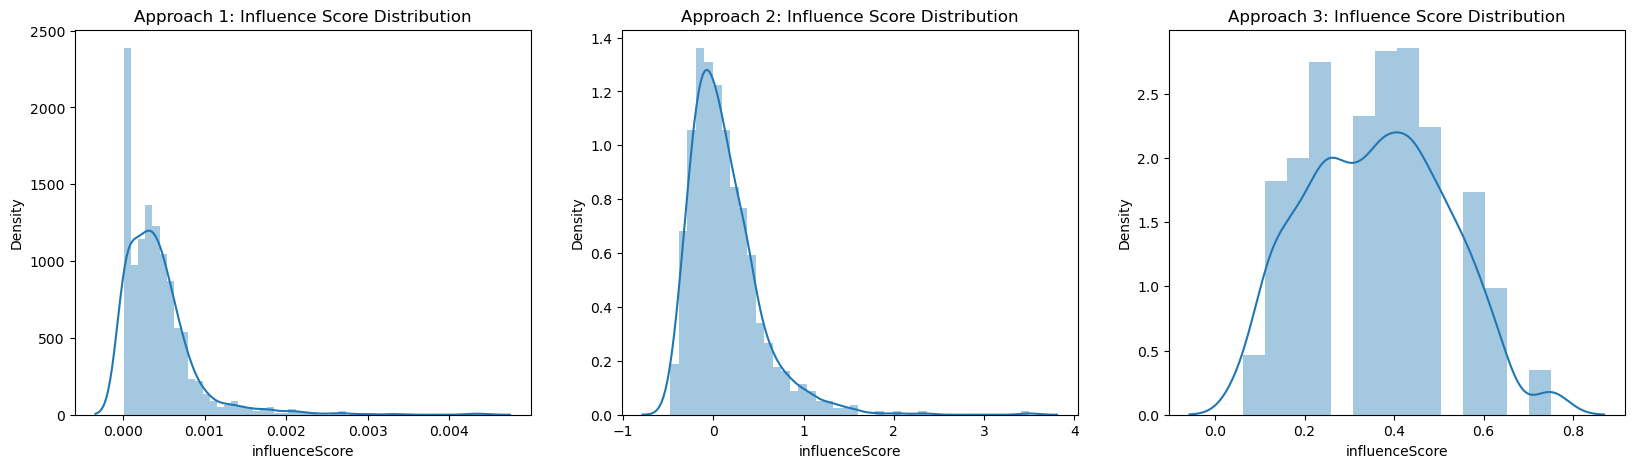

In [25]:
#1. Scoring Comparison
    #1.1. Final Score Distribution 
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
sns.distplot(influenceScoreData_A1["influenceScore"], ax = ax1).set_title('Approach 1: Influence Score Distribution')
sns.distplot(influenceScoreData_A2["influenceScore"], ax = ax2).set_title('Approach 2: Influence Score Distribution')
sns.distplot(influenceScoreData_A3["influenceScore"], ax = ax3).set_title('Approach 3: Influence Score Distribution')
plt.show()

ValueError: could not convert string to float: '3/8/'

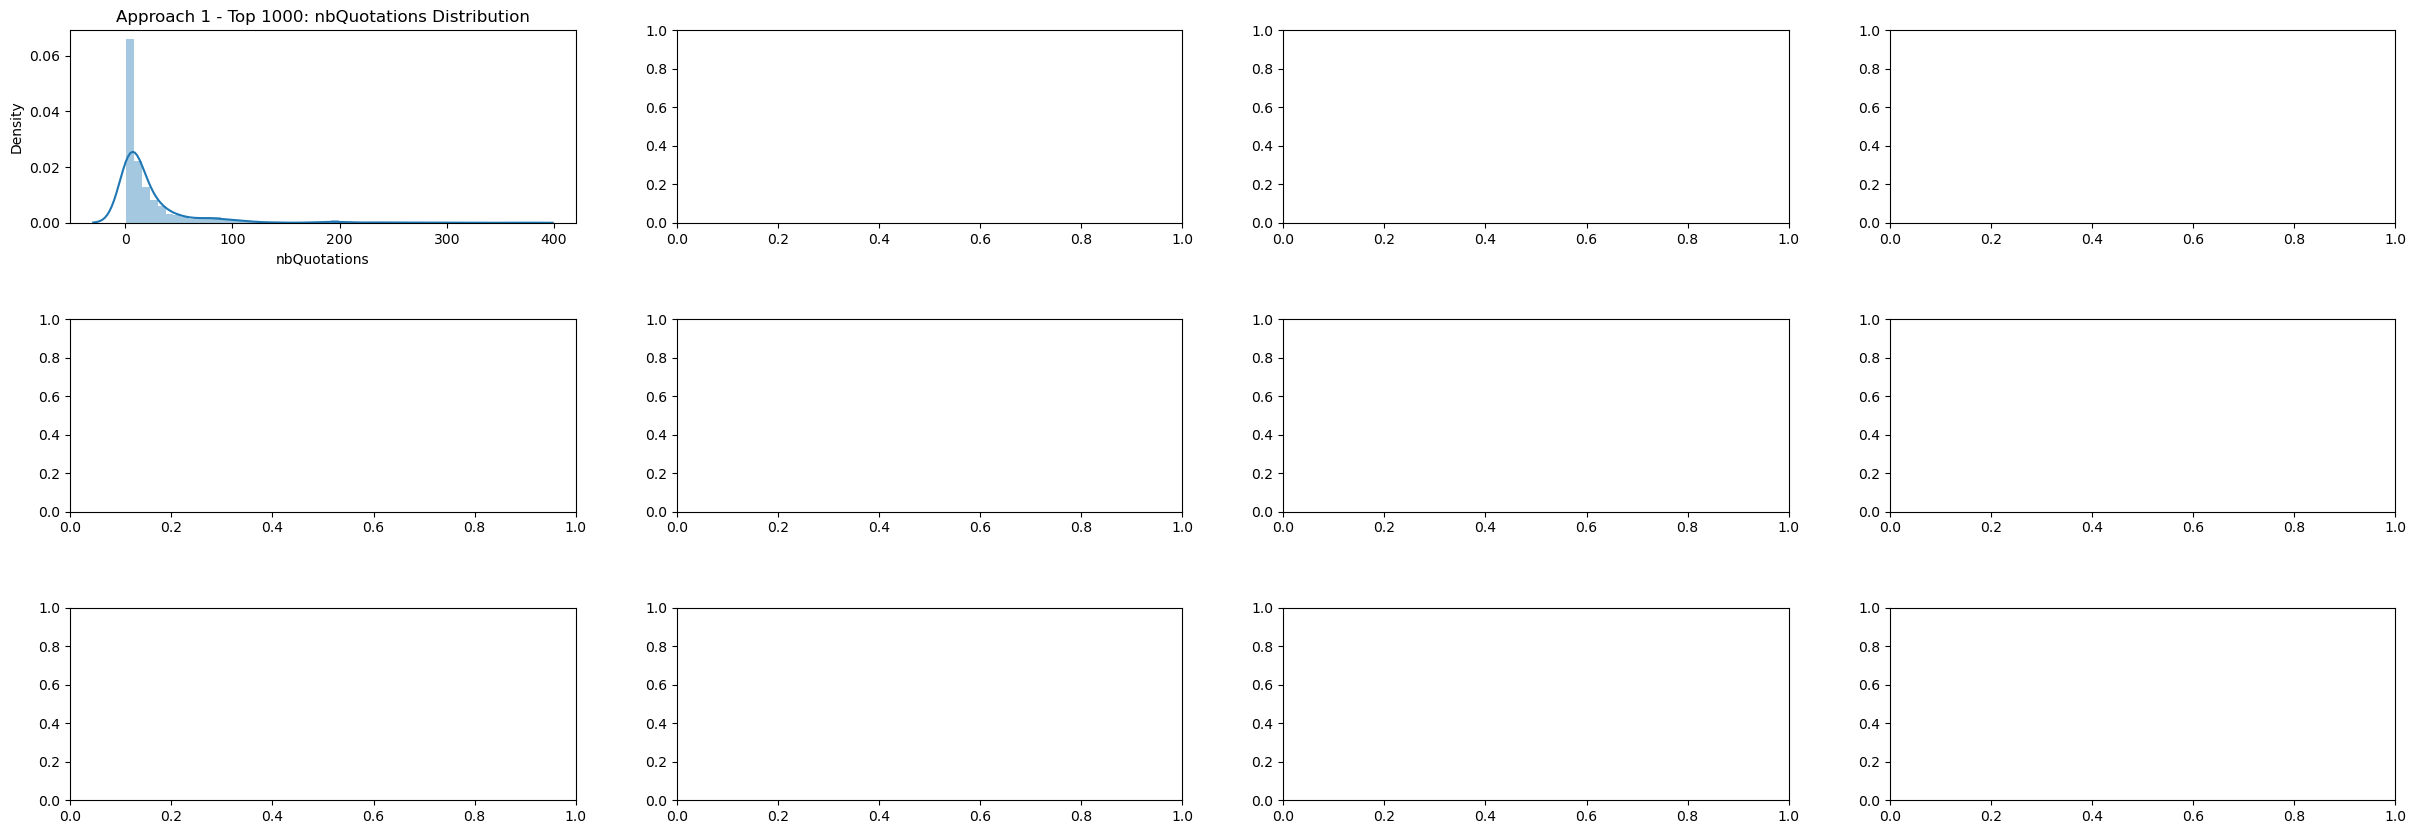

In [26]:
    #1.2. Top 1000 for each approaches - Deep diving the characteristics for each variables

top = 1000

top_A1 = influenceScoreData_A1[["title","year", "nbQuotations", "pageRankPublication", "authorP2", "influenceScore"]].sort_values(by = "influenceScore", ascending = False).head(top).reset_index(drop = True)
top_A2 = influenceScoreData_A2[["title","year", "nbQuotations", "pageRankPublication", "authorP2", "influenceScore"]].sort_values(by = "influenceScore", ascending = False).head(top).reset_index(drop = True)
top_A3 = influenceScoreData_A3[["title","year", "nbQuotations", "pageRankPublication", "authorP2", "influenceScore"]].sort_values(by = "influenceScore", ascending = False).head(top).reset_index(drop = True)

        #Distribution Visualization

fig, ax = plt.subplots(3,4,figsize=(30,10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

#Approach 1
sns.distplot(top_A1[(top_A1["nbQuotations"] != 0)]["nbQuotations"], ax = ax[0,0]).set_title('Approach 1 - Top '+str(top)+': nbQuotations Distribution') 
sns.distplot(top_A1["year"], ax = ax[0,1]).set_title('Approach 1 - Top '+str(top)+': Year Distribution')
sns.distplot(top_A1["pageRankPublication"], ax = ax[0,2]).set_title('Approach 1 - Top '+str(top)+': Pagerank Publication Distribution')
sns.distplot(top_A1["authorP2"], ax = ax[0,3]).set_title('Approach 1 - Top '+str(top)+': Author Score Distribution')

#Approach 2
sns.distplot(top_A2["nbQuotations"], ax = ax[1,0], color=".2").set_title('Approach 2 - Top '+str(top)+': nbQuotations Distribution')
sns.distplot(top_A2["year"], ax = ax[1,1], color=".2").set_title('Approach 2 - Top '+str(top)+': Year Distribution')
sns.distplot(top_A2["pageRankPublication"], ax = ax[1,2], color=".2").set_title('Approach 2 - Top '+str(top)+': Pagerank Publication Distribution')
sns.distplot(top_A2["authorP2"], ax = ax[1,3], color=".2").set_title('Approach 2 - Top '+str(top)+': Author Score Distribution')

#Approach 3
sns.distplot(top_A3["nbQuotations"], ax = ax[2,0], color="orange").set_title('Approach 3 - Top '+str(top)+': nbQuotations Distribution')
sns.distplot(top_A3["year"], ax = ax[2,1], color="orange").set_title('Approach 3 - Top '+str(top)+': Year Distribution')
sns.distplot(top_A3["pageRankPublication"], ax = ax[2,2], color="orange").set_title('Approach 3 - Top '+str(top)+': Pagerank Publication Distribution')
sns.distplot(top_A3["authorP2"], ax = ax[2,3], color="orange").set_title('Approach 3 - Top '+str(top)+': Author Score Distribution')

plt.show()

In [30]:
#1.3. Does the top1000 of each approaches have common papers in their top?
print("% of Common papers of Approach 1 with Approach 2 :", round(len(pd.merge(top_A1, top_A2, how='inner', on=['title']))/top*100,2))
print("% of Common papers of Approach 1 with Approach 3 :", round(len(pd.merge(top_A1, top_A3, how='inner', on=['title']))/top*100,2))
print("% of Common papers of Approach 2 with Approach 3 :", round(len(pd.merge(top_A3, top_A2, how='inner', on=['title']))/top*100,2))

% of Common papers of Approach 1 with Approach 2 : 24.9
% of Common papers of Approach 1 with Approach 3 : 7.9
% of Common papers of Approach 2 with Approach 3 : 5.7
